#### https://ocw.mit.edu/courses/sloan-school-of-management/15-071-the-analytics-edge-spring-2017/an-introduction-to-analytics/assignment-1/internet-privacy-poll/

# Problem 1.1 - Loading and Summarizing the Dataset
#### Using read.csv(), load the dataset from AnonymityPoll (CSV) into a data frame called poll and summarize it with the summary() and str() functions.
#### How many people participated in the poll?

In [1]:
poll <- read.csv('../data//AnonymityPoll.csv')
str(poll)

'data.frame':	1002 obs. of  13 variables:
 $ Internet.Use          : int  1 1 0 1 0 1 1 0 0 1 ...
 $ Smartphone            : int  0 0 1 0 NA 1 0 0 NA 0 ...
 $ Sex                   : Factor w/ 2 levels "Female","Male": 2 2 1 2 1 2 1 1 2 1 ...
 $ Age                   : int  62 45 70 70 80 49 52 76 75 76 ...
 $ State                 : Factor w/ 49 levels "Alabama","Arizona",..: 20 39 29 10 10 41 21 31 32 32 ...
 $ Region                : Factor w/ 4 levels "Midwest","Northeast",..: 2 3 2 3 3 3 1 2 3 3 ...
 $ Conservativeness      : int  4 1 4 4 4 4 3 3 4 4 ...
 $ Info.On.Internet      : int  0 1 0 3 NA 6 3 NA NA 0 ...
 $ Worry.About.Info      : int  1 0 0 1 NA 0 1 NA NA 0 ...
 $ Privacy.Importance    : num  100 0 NA 88.9 NA ...
 $ Anonymity.Possible    : int  0 1 0 1 NA 1 0 NA NA 1 ...
 $ Tried.Masking.Identity: int  0 0 0 0 NA 1 0 NA NA 0 ...
 $ Privacy.Laws.Effective: int  0 1 NA 0 NA 0 1 NA 0 1 ...


In [2]:
summary(poll)

  Internet.Use      Smartphone         Sex           Age       
 Min.   :0.0000   Min.   :0.0000   Female:505   Min.   :18.00  
 1st Qu.:1.0000   1st Qu.:0.0000   Male  :497   1st Qu.:37.00  
 Median :1.0000   Median :1.0000                Median :55.00  
 Mean   :0.7742   Mean   :0.5078                Mean   :52.37  
 3rd Qu.:1.0000   3rd Qu.:1.0000                3rd Qu.:66.00  
 Max.   :1.0000   Max.   :1.0000                Max.   :96.00  
 NA's   :1        NA's   :43                    NA's   :27     
          State           Region    Conservativeness Info.On.Internet
 California  :103   Midwest  :239   Min.   :1.000    Min.   : 0.000  
 Texas       : 72   Northeast:166   1st Qu.:3.000    1st Qu.: 2.000  
 New York    : 60   South    :359   Median :3.000    Median : 4.000  
 Pennsylvania: 45   West     :238   Mean   :3.277    Mean   : 3.795  
 Florida     : 42                   3rd Qu.:4.000    3rd Qu.: 6.000  
 Ohio        : 38                   Max.   :5.000    Max.   :11.000 

In [3]:
nrow(poll)

[1] 1002

In [4]:
sum(poll$Smartphone == 0, na.rm=T)

[1] 472

# Problem 1.3 - Loading and Summarizing the Dataset
#### By using the table() function on two variables, we can tell how they are related. To use the table() function on two variables, just put the two variable names inside the parentheses, separated by a comma (don't forget to add poll\\$ before each variable name). In the output, the possible values of the first variable will be listed in the left, and the possible values of the second variable will be listed on the top. Each entry of the table counts the number of observations in the data set that have the value of the first value in that row, and the value of the second variable in that column. For example, suppose we want to create a table of the variables "Sex" and "Region". We would type:
#### table(poll\\$Sex, poll\\$Region)
#### in our R Console, and we would get as output:
#### Midwest Northeast South West
#### Female 123 90 176 116
#### Male 116 76 183 122
#### This table tells us that we have 123 people in our dataset who are female and from the Midwest, 116 people in our dataset who are male and from the Midwest, 90 people in our dataset who are female and from the Northeast, etc.
#### You might find it helpful to use the table() function to answer the following questions:
<font color='red'>Colorado</font><br>
<font color='red'>Kansas</font><br>
<font color='red'>Kentucky</font><br>
<font color='red'>Missouri</font><br>
<font color='red'>Ohio</font><br>
<font color='red'>Pennsylvania</font><br>

In [5]:
sort(table(poll$State, poll$Region)[,1]>0, decreasing = T)

Illinois              Indiana                 Iowa 
                TRUE                 TRUE                 TRUE 
              Kansas             Michigan            Minnesota 
                TRUE                 TRUE                 TRUE 
            Missouri             Nebraska         North Dakota 
                TRUE                 TRUE                 TRUE 
                Ohio         South Dakota            Wisconsin 
                TRUE                 TRUE                 TRUE 
             Alabama              Arizona             Arkansas 
               FALSE                FALSE                FALSE 
          California             Colorado          Connecticut 
               FALSE                FALSE                FALSE 
            Delaware District of Columbia              Florida 
               FALSE                FALSE                FALSE 
             Georgia                Idaho             Kentucky 
               FALSE                FALSE                FALSE 
           Louisiana                Maine             Maryland 
               FALSE                FALSE                FALSE 
       Massachusetts          Mississippi              Montana 
               FALSE                FALSE                FALSE 
              Nevada        New Hampshire           New Jersey 
               FALSE                FALSE                FALSE 
          New Mexico             New York       North Carolina 
               FALSE                FALSE                FALSE 
            Oklahoma               Oregon         Pennsylvania 
               FALSE                FALSE                FALSE 
        Rhode Island       South Carolina            Tennessee 
               FALSE                FALSE                FALSE 
               Texas                 Utah              Vermont 
               FALSE                FALSE                FALSE 
            Virginia           Washington        West Virginia 
               FALSE                FALSE                FALSE 
             Wyoming 
               FALSE

#### Which of the following are states in the Midwest census region? (Select all that apply.)

In [6]:
which.max(tapply(poll$Region == 'South', poll$State, sum, na.rm=T))

Texas 
   42

# Problem 2.1 - Internet and Smartphone Users
#### As mentioned in the introduction to this problem, many of the response variables (Info.On.Internet, Worry.About.Info, Privacy.Importance, Anonymity.Possible, and Tried.Masking.Identity) were not collected if an interviewee does not use the Internet or a smartphone, meaning the variables will have missing values for these interviewees.
#### How many interviewees reported not having used the Internet and not having used a smartphone?

In [7]:
nrow(subset(poll, Smartphone == 0 & Internet.Use == 0))

[1] 186

#### How many interviewees reported having used the Internet and having used a smartphone?

In [8]:
nrow(subset(poll, Smartphone == 1 & Internet.Use == 1))

[1] 470

#### How many interviewees reported having used the Internet but not having used a smartphone?

In [9]:
nrow(subset(poll, Smartphone == 0 & Internet.Use == 1))

[1] 285

#### How many interviewees reported having used a smartphone but not having used the Internet?

In [10]:
nrow(subset(poll, Smartphone == 1 & Internet.Use == 0))

[1] 17

# Problem 2.2 - Internet and Smartphone Users
#### mHow many interviewees have a missing value for their Internet use?

In [11]:
summary(poll$Internet.Use)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  1.0000  1.0000  0.7742  1.0000  1.0000       1 

#### How many interviewees have a missing value for their smartphone use?

In [12]:
summary(poll$Smartphone)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  1.0000  0.5078  1.0000  1.0000      43 

# Problem 2.3 - Internet and Smartphone Users
#### Use the subset function to obtain a data frame called "limited", which is limited to interviewees who reported Internet use or who reported smartphone use. In lecture, we used the & symbol to use two criteria to make a subset of the data. To only take observations that have a certain value in one variable or the other, the | character can be used in place of the & symbol. This is also called a logical "or" operation.
#### How many interviewees are in the new data frame?

In [13]:
limited <- subset(poll, Internet.Use | Smartphone)
nrow(limited)

[1] 792

# <font color='red'>Important: For all remaining questions in this assignment please use the limited data frame you created in Problem 2.3.</font>

# Problem 3.1 - Summarizing Opinions about Internet Privacy
#### Which variables have missing values in the limited data frame? (Select all that apply.)

<font color='red'>Internet.Use</font><br>
<font color='red'>Smartphone</font> # Correct<br>
<font color='red'>Sex</font><br>
<font color='red'>Age</font> # Correct<br>
<font color='red'>State</font><br>
<font color='red'>Region</font><br>
<font color='red'>Conservativeness</font> # Correct<br>
<font color='red'>Info.On.Internet</font><br>
<font color='red'>Worry.About.Info</font> # Correct<br>
<font color='red'>Privacy.Importance</font> # Correct<br>
<font color='red'>Anonymity.Possible</font> # Correct<br>
<font color='red'>Tried.Masking.Identity</font> # Correct<br>
<font color='red'>Privacy.Laws.Effective</font> # Correct<br>

In [14]:
sort(colnames(limited)[colSums(is.na(limited)) > 0])

[1] "Age"                    "Anonymity.Possible"     "Conservativeness"      
[4] "Privacy.Importance"     "Privacy.Laws.Effective" "Smartphone"            
[7] "Tried.Masking.Identity" "Worry.About.Info"

# Problem 3.2 - Summarizing Opinions about Internet Privacy
#### What is the average number of pieces of personal information on the Internet, according to the Info.On.Internet variable?

In [15]:
mean(limited$Info.On.Internet)

[1] 3.795455

# Problem 3.3 - Summarizing Opinions about Internet Privacy
#### How many interviewees reported a value of 0 for Info.On.Internet?

In [16]:
sum(limited$Info.On.Internet == 0)

[1] 105

#### How many interviewees reported the maximum value of 11 for Info.On.Internet?

In [17]:
sum(limited$Info.On.Internet == 11)

[1] 8

# Problem 3.4 - Summarizing Opinions about Internet Privacy
#### What proportion of interviewees who answered the Worry.About.Info question worry about how much information is available about them on the Internet? Note that to compute this proportion you will be dividing by the number of people who answered the Worry.About.Info question, not the total number of people in the data frame.

In [18]:
sum(limited$Worry.About.Info == 1, na.rm = T) / nrow(limited)

[1] 0.4873737

# Problem 3.5 - Summarizing Opinions about Internet Privacy
#### What proportion of interviewees who answered the Anonymity.Possible question think it is possible to be completely anonymous on the Internet?

In [19]:
library(dplyr)
a <- limited %>% 
filter(!is.na(Anonymity.Possible))
sum(a$Anonymity.Possible==1) / nrow(a)

# Another way to do the same, but bot are very long.
lg <- group_by(limited, TF = as.logical(Anonymity.Possible))
lg <- filter(lg, !is.na(TF)) %>% 
summarise(count = n())
subset(lg, TF == TRUE)$count / sum(lg$count)

# Another way to do the same(manually)
table(limited$Anonymity.Possible)
278 / (475 + 278)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] 0.3691899

[1] 0.3691899


  0   1 
475 278 

[1] 0.3691899

# Problem 3.6 - Summarizing Opinions about Internet Privacy
#### What proportion of interviewees who answered the Tried.Masking.Identity question have tried masking their identity on the Internet?

In [20]:
a <- limited %>% 
filter(!is.na(Tried.Masking.Identity))
sum(a$Tried.Masking.Identity==1) / nrow(a)

[1] 0.1632653

# Problem 3.7 - Summarizing Opinions about Internet Privacy
#### What proportion of interviewees who answered the Privacy.Laws.Effective question find United States privacy laws effective?

In [21]:
a <- limited %>% 
filter(!is.na(Privacy.Laws.Effective))
sum(a$Privacy.Laws.Effective==1) / nrow(a)

[1] 0.2558459

# Problem 4.1 - Relating Demographics to Polling Results
#### Often, we are interested in whether certain characteristics of interviewees (e.g. their age or political opinions) affect their opinions on the topic of the poll (in this case, opinions on privacy). In this section, we will investigate the relationship between the characteristics Age and Smartphone and outcome variables Info.On.Internet and Tried.Masking.Identity, again using the limited data frame we built in an earlier section of this problem.
#### Build a histogram of the age of interviewees. What is the best represented age group in the population?
<font color='red'>People aged about 20 years old</font><br>
<font color='red'>People aged about 40 years old</font><br>
<font color='red'>People aged about 60 years old</font> # Correct <br>
<font color='red'>People aged about 80 years old</font><br>

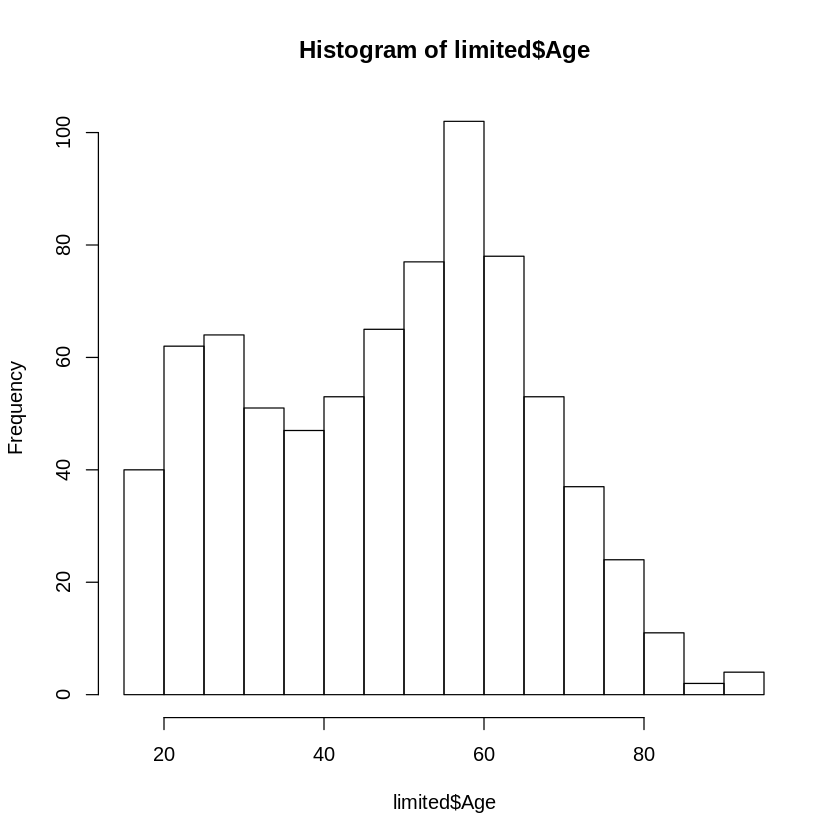

In [22]:
hist(limited$Age)

# Problem 4.2 - Relating Demographics to Polling Results
#### Both Age and Info.On.Internet are variables that take on many values, so a good way to observe their relationship is through a graph. We learned in lecture that we can plot Age against Info.On.Internet with the command plot(limited\\$Age, limited\\$Info.On.Internet). However, because Info.On.Internet takes on a small number of values, multiple points can be plotted in exactly the same location on this graph.
#### What is the largest number of interviewees that have exactly the same value in their Age variable AND the same value in their Info.On.Internet variable? In other words, what is the largest number of overlapping points in the plot plot(limited\\$Age, limited\\$Info.On.Internet)? (HINT: Use the table function to compare the number of observations with different values of Age and Info.On.Internet.)

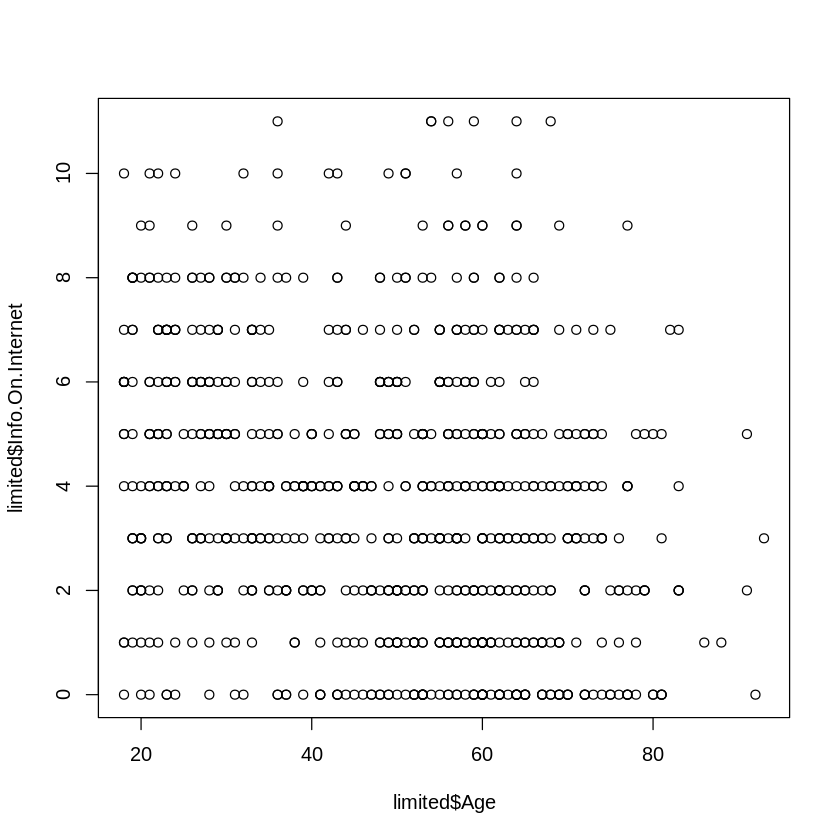

In [23]:
plot(limited$Age, limited$Info.On.Internet)

In [24]:
max(table(limited$Age, limited$Info.On.Internet))

[1] 6

# Problem 4.3 - Relating Demographics to Polling Results
#### To avoid points covering each other up, we can use the jitter() function on the values we pass to the plot function. Experimenting with the command jitter(c(1, 2, 3)), what appears to be the functionality of the jitter command?

<font color='red'>jitter randomly reorders the values passed to it, and two runs will yield the same result</font><br>
<font color='red'>jitter randomly reorders the values passed to it, and two runs will yield different results</font><br>
<font color='red'>jitter adds or subtracts a small amount of random noise to the values passed to it, and two runs will yield the same result</font><br>
<font color='red'>jitter adds or subtracts a small amount of random noise to the values passed to it, and two runs will yield different results</font> # Correct <br>

In [25]:
for (i in 1:10){
    print(jitter(c(1, 2, 3)))
    }

[1] 0.8011648 1.9098327 3.1112427
[1] 0.9391032 1.9784982 3.1198952
[1] 1.065645 2.023304 3.026758
[1] 1.099869 2.197619 2.948268
[1] 0.8781811 2.0250285 3.0313325
[1] 1.000467 2.029426 2.909116
[1] 0.8683358 1.8449793 3.1779511
[1] 1.070053 1.829330 3.079106
[1] 0.9035277 1.9487321 3.0366761
[1] 1.174315 2.012465 3.141666


# Problem 4.4 - Relating Demographics to Polling Results
#### Now, plot Age against Info.On.Internet with plot(jitter(limited\\$Age), jitter(limited\\$Info.On.Internet)). What relationship to you observe between Age and Info.On.Internet?

<font color='red'>Older age seems strongly associated with a larger value for Info.On.Internet</font><br>
<font color='red'>Older age seems moderately associated with a larger value for Info.On.Internet</font><br>
<font color='red'>Older age does not seem associated with a change in the value of Info.On.Internet</font><br>
<font color='red'>Older age seems moderately associated with a smaller value for Info.On.Internet</font> # Correct <br>
<font color='red'>Older age seems strongly associated with a smaller value for Info.On.Internet</font><br>

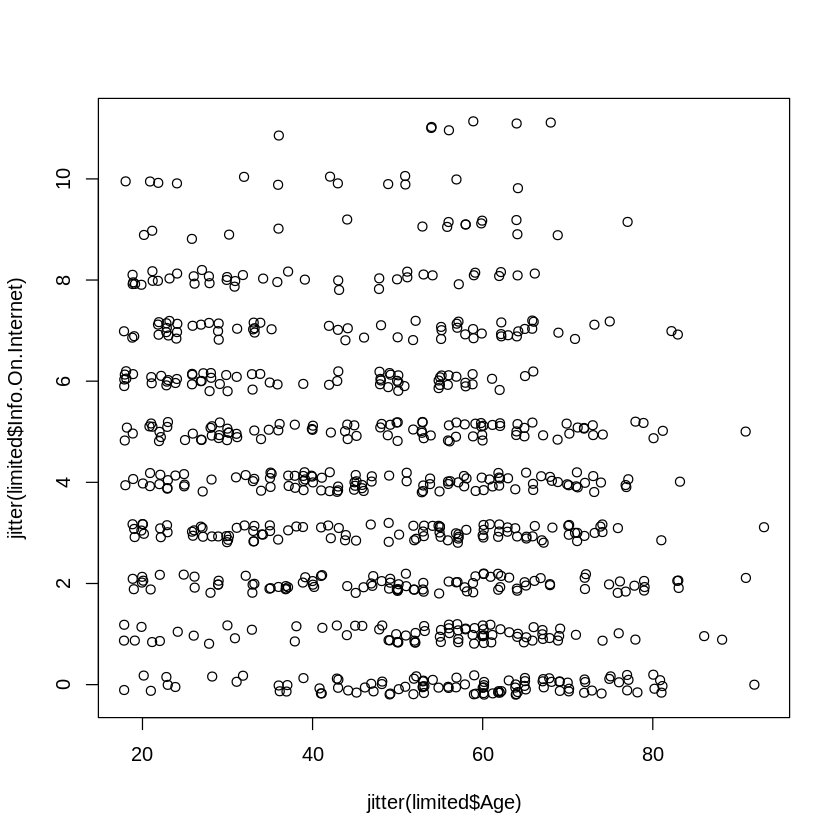

In [26]:
plot(jitter(limited$Age), jitter(limited$Info.On.Internet))

# Problem 4.5 - Relating Demographics to Polling Results
#### Use the tapply() function to obtain the summary of the Info.On.Internet value, broken down by whether an interviewee is a smartphone user.
#### What is the average Info.On.Internet value for smartphone users?

In [27]:
tapply(limited$Info.On.Internet, limited$Smartphone, mean)

0        1 
2.922807 4.367556

#### What is the average Info.On.Internet value for non-smartphone users?

In [28]:
tapply(limited$Info.On.Internet, limited$Smartphone, mean)

0        1 
2.922807 4.367556

# Problem 4.6 - Relating Demographics to Polling Results
#### Similarly use tapply to break down the Tried.Masking.Identity variable for smartphone and non-smartphone users.
#### What proportion of smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?

In [29]:
tapply(limited$Tried.Masking.Identity, limited$Smartphone, mean, na.rm = TRUE)

0         1 
0.1174377 0.1925466

#### What proportion of non-smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?

In [30]:
tapply(limited$Tried.Masking.Identity, limited$Smartphone, mean, na.rm = TRUE)

0         1 
0.1174377 0.1925466